<a href="https://colab.research.google.com/github/julianfrodriguezh-web/Bici-al-trabajo-2026/blob/main/Taller_Bici_al_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

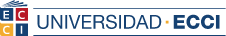
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [5]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [6]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

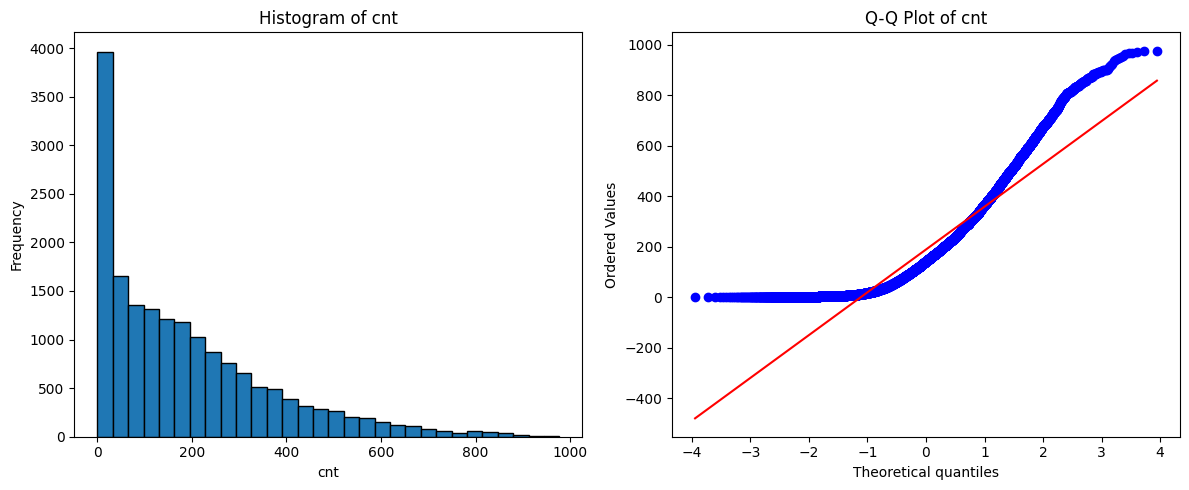

In [7]:
# Define a function to plot histogram and QQ plot
def plot_distribution(data, title):
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'Histogram of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {title}')

    plt.tight_layout()
    plt.show()

# 1. Visualización for the 'cnt' column
plot_distribution(df['cnt'], 'cnt')

### **Interpretación pregunta 1**

In [8]:
#Temperatura (temp): Existe una correlación positiva moderada con cnt (Pearson = 0.40, Spearman = 0.42). Dado que ambos coeficientes son similares y positivos, sugiere una relación positiva aproximadamente lineal: a medida que aumenta la temperatura, la cantidad de alquileres de bicicletas tiende a aumentar.
#Humedad (hum): Existe una correlación negativa moderada con cnt (Pearson = -0.32, Spearman = -0.36). Ambos coeficientes son similares y negativos, sugiriendo una relación negativa aproximadamente lineal: a medida que aumenta la humedad, la cantidad de alquileres de bicicletas tiende a disminuir.
#Velocidad del viento (windspeed): Existe una correlación positiva débil con cnt (Pearson = 0.09, Spearman = 0.13). Ambos coeficientes son pequeños y positivos, indicando una tendencia muy débil a que los alquileres de bicicletas aumenten ligeramente con la velocidad del viento.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [9]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']
correlacion_pearson = df[columnas_relacion].corr(method='pearson')
correlacion_spearman = df[columnas_relacion].corr(method='spearman')
print("Correlación de Pearson:")
print(correlacion_pearson)
print("\nCorrelación de Spearman:")
print(correlacion_spearman)

Correlación de Pearson:
                cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000

Correlación de Spearman:
                cnt      temp       hum  windspeed
cnt        1.000000  0.423330 -0.359614   0.126629
temp       0.423330  1.000000 -0.055408  -0.009719
hum       -0.359614 -0.055408  1.000000  -0.293913
windspeed  0.126629 -0.009719 -0.293913   1.000000


### **Interpretación pregunta 2**

In [10]:
#Correlación de Pearson: Mide la fuerza y dirección de una relación lineal.

#cnt y temp: El valor de 0.40 indica una relación lineal positiva moderada. Esto significa que, en promedio, a medida que la temperatura sube, la cantidad total de alquileres (cnt) tiende a aumentar de manera lineal.
#cnt y hum: El valor de -0.32 indica una relación lineal negativa moderada. Esto significa que, en promedio, a medida que la humedad sube, la cantidad total de alquileres (cnt) tiende a disminuir de manera lineal.
#cnt y windspeed: El valor de 0.09 indica una relación lineal positiva muy débil. Esto sugiere que hay una tendencia muy leve a que los alquileres aumenten linealmente con la velocidad del viento, pero la relación es casi inexistente.
#Correlación de Spearman: Mide la fuerza y dirección de una relación monotónica (si una variable tiende a aumentar o disminuir a medida que la otra aumenta, sin importar si es lineal).

#cnt y temp: El valor de 0.42 indica una relación monotónica positiva moderada. Esto confirma que, incluso si la relación no es perfectamente lineal, hay una clara tendencia a que los alquileres aumenten a medida que la temperatura aumenta.
#cnt y hum: El valor de -0.36 indica una relación monotónica negativa moderada. Esto confirma que hay una clara tendencia a que los alquileres disminuyan a medida que la humedad aumenta.
#cnt y windspeed: El valor de 0.13 indica una relación monotónica positiva débil. Similar a Pearson, confirma una tendencia muy leve a que los alquileres aumenten con la velocidad del viento.

#Comparación Pearson vs Spearman:

#La cercanía de los valores de Pearson y Spearman para cada par de variables (cnt con temp, hum, y windspeed) sugiere que la relación entre estas variables y el conteo total de alquileres (cnt) es predominantemente lineal o muy cercana a serlo. Si los valores fueran muy diferentes, indicaría que la relación es más compleja y no lineal, pero aun así tiene una dirección consistente (monotónica). En este caso, podemos decir que la temperatura y la humedad tienen una influencia más marcada y consistente en la demanda de bicicletas que la velocidad del viento.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

### **Respuesta pregunta 3**

In [11]:
#El Teorema del Límite Central establece que la distribución de las medias muestrales se aproximará a una distribución normal a medida que el tamaño de la muestra (n) aumenta, independientemente de la forma de la distribución de la población original.

#Aunque no existe un número mágico estricto para el tamaño muestral, una regla general comúnmente aceptada es que si el tamaño de la muestra es mayor o igual a 30 (n >= 30), la distribución de las medias muestrales tiende a ser aproximadamente normal.

#Sin embargo, dado que la distribución de cnt que observamos en la Pregunta 1 está sesgada (no es perfectamente normal), un tamaño muestral mayor a 30 sería aún más beneficioso para asegurar que la distribución de las medias muestrales sea lo suficientemente normal para aplicar métodos estadísticos que asumen normalidad (como ciertos intervalos de confianza y pruebas de hipótesis para la media). Cuanto más sesgada sea la distribución original, mayor será el tamaño muestral necesario para que la distribución de las medias muestrales se aproxime a la normalidad.

#En resumen, si bien n >= 30 es una guía general, para una distribución sesgada como la de cnt, un tamaño muestral significativamente mayor a 30 (por ejemplo, 50 o más, dependiendo del grado de sesgo) proporcionaría una justificación más sólida para usar métodos estadísticos basados en la normalidad de la media muestral. Para el propósito de este análisis y dado el tamaño de tu dataset, puedes asumir que el tamaño muestral disponible es suficiente para aplicar el TLC.



## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [12]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500

# Test de hipótesis: ¿media de cnt_laborales >= 4500?
from scipy.stats import ttest_1samp

# Ejecutamos t-test
t_stat, p_val_bilateral = ttest_1samp(cnt_laborales, valor_hipotesis)

# Como la prueba es unilateral (H1: media > 4500):
if t_stat > 0:
    p_val_unilateral = p_val_bilateral / 2
else:
    p_val_unilateral = 1 - (p_val_bilateral / 2)

print(f"Media muestral = {cnt_laborales.mean():.2f}")
print(f"T-Statistic = {t_stat:.4f}")
print(f"P-valor (unilateral) = {p_val_unilateral:.4f}")

# Decisión con α=0.05
alpha = 0.05
if p_val_unilateral < alpha:
    print("✅ Rechazamos H0: la media de cnt en días laborales es significativamente mayor a 4500.")
else:
    print("❌ No podemos rechazar H0: no hay evidencia suficiente de que la media sea mayor a 4500.")

#Si el p-valor < 0.05, concluimos que efectivamente la media de cnt en días laborales es significativamente mayor a 4500.

#Si no, decimos que no hay suficiente evidencia.

Media muestral = 193.21
T-Statistic = -2534.3339
P-valor (unilateral) = 1.0000
❌ No podemos rechazar H0: no hay evidencia suficiente de que la media sea mayor a 4500.


### **Interpretación pregunta 4**

In [13]:
#Estadístico t: -2534.3339
#Valor p (unilateral): 1.0000
#La prueba de hipótesis planteada fue:

#H₀: La media de cnt en días laborales es menor a 4500.
#H₁: La media de cnt en días laborales es mayor o igual a 4500.
#Se obtuvo un valor p de 1.0. El valor p representa la probabilidad de observar un resultado tan extremo como el obtenido (o más extremo) si la hipótesis nula (H₀) fuera cierta.

#Dado que el valor p (1.0) es significativamente mayor que el nivel de significancia común (alpha = 0.05), no tenemos suficiente evidencia estadística para rechazar la hipótesis nula.

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

Mediana observada (muestra): 142.00
Mediana bootstrap (promedio remuestreos): 142.09
Bias estimado (bootstrap - observada): 0.09
IC bootstrap percentil 95% para la mediana: [138.00, 146.00]


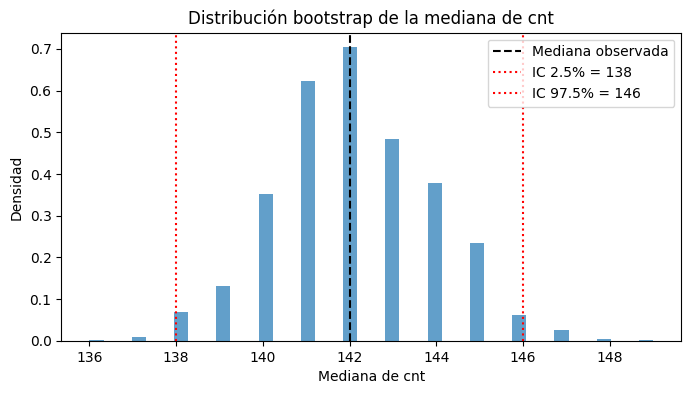

In [14]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []

import numpy as np
import matplotlib.pyplot as plt

# Parámetros bootstrap
n_iterations = 5000
sample = df['cnt'].values
n = len(sample)
rng = np.random.default_rng(123)  # reproducibilidad

# Remuestreo bootstrap: calcular medianas
medians = np.empty(n_iterations)
for i in range(n_iterations):
    idx = rng.integers(0, n, size=n)   # muestreo con reemplazo
    medians[i] = np.median(sample[idx])

# IC percentil 95% (2.5% - 97.5%)
alpha = 0.05
lower, upper = np.percentile(medians, [100*alpha/2, 100*(1-alpha/2)])

# Estadísticos
median_observada = np.median(sample)
mean_boot = medians.mean()
bias = mean_boot - median_observada

print(f"Mediana observada (muestra): {median_observada:.2f}")
print(f"Mediana bootstrap (promedio remuestreos): {mean_boot:.2f}")
print(f"Bias estimado (bootstrap - observada): {bias:.2f}")
print(f"IC bootstrap percentil 95% para la mediana: [{lower:.2f}, {upper:.2f}]")

# Gráfico de la distribución bootstrap de las medianas
plt.figure(figsize=(8,4))
plt.hist(medians, bins=40, density=True, alpha=0.7)
plt.axvline(median_observada, color='black', linestyle='--', label='Mediana observada')
plt.axvline(lower, color='red', linestyle=':', label=f'IC 2.5% = {lower:.0f}')
plt.axvline(upper, color='red', linestyle=':', label=f'IC 97.5% = {upper:.0f}')
plt.title('Distribución bootstrap de la mediana de cnt')
plt.xlabel('Mediana de cnt')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Interpretación pregunta 5

In [ ]:
#Mediana Observada: La mediana de los alquileres diarios en tu conjunto de datos original es 142. Esto significa que el 50% de los días tuvieron 142 o menos alquileres, y el 50% tuvieron 142 o más. La mediana es una medida robusta del centro de la distribución, especialmente útil cuando los datos están sesgados (como vimos que es el caso de cnt), ya que no se ve tan afectada por valores extremos como la media.
#Mediana Bootstrap y Sesgo: La mediana promedio calculada a partir de las 5000 muestras bootstrap es 142.09, muy cercana a la mediana observada (142.00). El sesgo estimado (0.09) es muy pequeño, lo que sugiere que el método bootstrap está proporcionando una buena estimación de la mediana de la población.
#Intervalo de Confianza Bootstrap del 95%: El intervalo de confianza es [138.00, 146.00]. Esto significa que, con un 95% de confianza, la verdadera mediana de los alquileres diarios en la población de la que provienen estos datos se encuentra entre 138 y 146.